In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=10, suppress=True)

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
def miss_val_fixer(data):
    imp = SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
    imp = imp.fit(data)
    fixed_data = imp.transform(data)
    return fixed_data

def standardize(train,valid):
    scaler = StandardScaler()
    std_train = scaler.fit_transform(train)
    std_valid = scaler.transform(valid)
    return std_train,std_valid

In [4]:

# dataset
dataset = pd.read_csv("SMRT_fixed.csv",low_memory=False)
dataset = miss_val_fixer(dataset)

train_set, test_set = train_test_split(dataset, test_size=0.25, random_state=42)


data = dataset[:,2:]
train_set, test_set = train_test_split(data, test_size=0.25, random_state=42)


train_X, test_X = standardize(train_set[:,:-1],test_set[:,:-1])
train_Y = train_set[:,-1]
test_Y = test_set[:,-1]

#train_X = np.expand_dims(train_X, axis=1)
#test_X = np.expand_dims(test_X, axis=1)

In [153]:
model = tf.keras.models.Sequential([
    #layers.Dense(200, activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l2(0.001)),#kernel_initializer="he_normal"
    layers.Dense(100, activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l2(0.001)),#kernel_initializer="he_normal"
    layers.Dense(50 , activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l2(0.001)),#kernel_initializer="he_normal"
    layers.Dense(20 , activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l2(0.001)),#kernel_initializer="he_normal"
    layers.Dense(1)])

In [154]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=opt)
history_2 = model.fit(train_X, train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size=35,shuffle=True)

Epoch 1/20
1716/1716 [==============================] - 2s 842us/step - loss: 70082.1484 - val_loss: 41672.6250
Epoch 2/20
1716/1716 [==============================] - 1s 810us/step - loss: 38928.7266 - val_loss: 40597.5977
Epoch 3/20
1716/1716 [==============================] - 1s 845us/step - loss: 37443.7539 - val_loss: 38816.0586
Epoch 4/20
1716/1716 [==============================] - 1s 849us/step - loss: 36470.7461 - val_loss: 39832.5898
Epoch 5/20
1716/1716 [==============================] - 1s 853us/step - loss: 35768.6758 - val_loss: 39241.2578
Epoch 6/20
1716/1716 [==============================] - 1s 843us/step - loss: 35197.5977 - val_loss: 38788.7969
Epoch 7/20
1716/1716 [==============================] - 1s 843us/step - loss: 34787.9102 - val_loss: 38952.1094
Epoch 8/20
1716/1716 [==============================] - 1s 847us/step - loss: 34221.6406 - val_loss: 40152.4570
Epoch 9/20
1716/1716 [==============================] - 1s 857us/step - loss: 33794.4414 - val_loss: 395

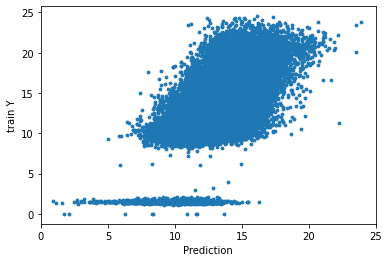

In [155]:
plt.scatter((model.predict(train_X))/60,train_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

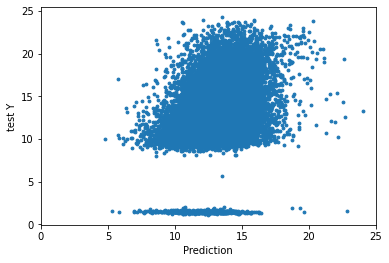

In [156]:
plt.scatter((model.predict(test_X))/60,test_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

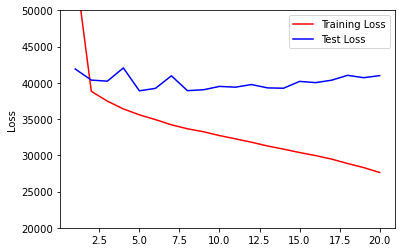

In [157]:
training_loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, test_loss, 'b')
plt.legend(['Training Loss', 'Test Loss'])
plt.ylim([20000,50000])
plt.ylabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [160]:
model = tf.keras.models.Sequential([
    #layers.Dense(200, activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l2(0.001)),#kernel_initializer="he_normal"
    layers.Dense(100, activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l1(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(50 , activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l1(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(20 , activation="relu", input_shape=train_X.shape[1:],kernel_regularizer=l1(0.0001)),#kernel_initializer="he_normal"
    layers.Dense(1)])

In [161]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=opt)
history_2 = model.fit(train_X, train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size=35,shuffle=True)

Epoch 1/20
1716/1716 [==============================] - 2s 823us/step - loss: 67362.8047 - val_loss: 40954.6367
Epoch 2/20
1716/1716 [==============================] - 1s 763us/step - loss: 38609.4141 - val_loss: 39726.8906
Epoch 3/20
1716/1716 [==============================] - 1s 765us/step - loss: 37132.9141 - val_loss: 39376.1992
Epoch 4/20
1716/1716 [==============================] - 1s 769us/step - loss: 36346.3945 - val_loss: 39430.4375
Epoch 5/20
1716/1716 [==============================] - 1s 825us/step - loss: 35503.5039 - val_loss: 38622.4688
Epoch 6/20
1716/1716 [==============================] - 1s 827us/step - loss: 34970.2227 - val_loss: 39423.6016
Epoch 7/20
1716/1716 [==============================] - 1s 828us/step - loss: 34430.6367 - val_loss: 38769.9531
Epoch 8/20
1716/1716 [==============================] - 1s 828us/step - loss: 33998.5547 - val_loss: 38796.2891
Epoch 9/20
1716/1716 [==============================] - 1s 826us/step - loss: 33563.5859 - val_loss: 396

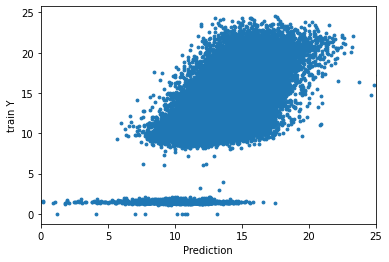

In [162]:
plt.scatter((model.predict(train_X))/60,train_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

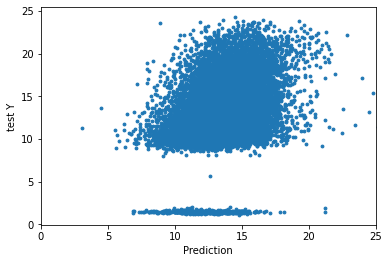

In [163]:
plt.scatter((model.predict(test_X))/60,test_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

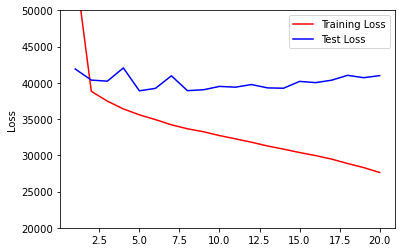

In [164]:
training_loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, test_loss, 'b')
plt.legend(['Training Loss', 'Test Loss'])
plt.ylim([20000,50000])
plt.ylabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [5]:
train_X = np.expand_dims(train_X, axis=1)
test_X = np.expand_dims(test_X, axis=1)

In [36]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPool1D(pool_size=1),
    layers.Conv1D(filters=96, kernel_size=2, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=96, kernel_size=2, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Conv1D(filters=128, kernel_size=1, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Flatten(),
    #layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])

In [37]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt)
history_3 = model.fit(train_X, train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size=35,shuffle=True)

Epoch 1/20
1716/1716 [==============================] - 4s 2ms/step - loss: 106090.5391 - val_loss: 41694.6211
Epoch 2/20
1716/1716 [==============================] - 4s 2ms/step - loss: 39287.6641 - val_loss: 39939.4648
Epoch 3/20
1716/1716 [==============================] - 4s 2ms/step - loss: 37698.8242 - val_loss: 38934.7383
Epoch 4/20
1716/1716 [==============================] - 3s 2ms/step - loss: 36873.5039 - val_loss: 38882.3477
Epoch 5/20
1716/1716 [==============================] - 3s 2ms/step - loss: 36135.4062 - val_loss: 38554.9414
Epoch 6/20
1716/1716 [==============================] - 4s 2ms/step - loss: 35666.2852 - val_loss: 38428.9102
Epoch 7/20
1716/1716 [==============================] - 3s 2ms/step - loss: 35227.0781 - val_loss: 38121.6445
Epoch 8/20
1716/1716 [==============================] - 4s 2ms/step - loss: 34757.1602 - val_loss: 38532.1836
Epoch 9/20
1716/1716 [==============================] - 4s 2ms/step - loss: 34461.6797 - val_loss: 38569.6953
Epoch 10/

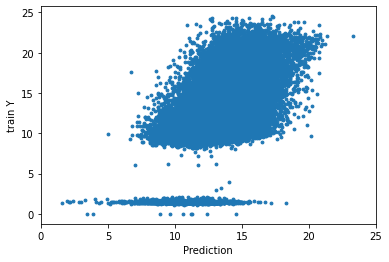

In [38]:
plt.scatter((model.predict(train_X))/60,train_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

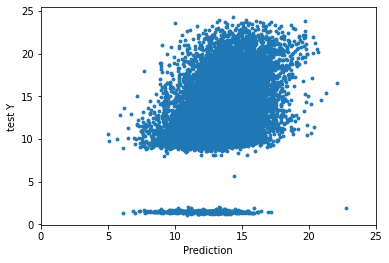

In [39]:
plt.scatter((model.predict(test_X))/60,test_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

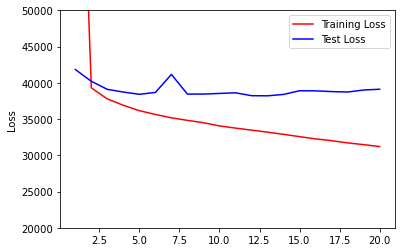

In [33]:
training_loss = history_3.history['loss']
test_loss = history_3.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, test_loss, 'b')
plt.legend(['Training Loss', 'Test Loss'])
plt.ylim([20000,50000])
plt.ylabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [91]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.0001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Conv1D(filters=128, kernel_size=2, padding='same', activation="relu", kernel_regularizer=l1(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=128, kernel_size=2, padding='same', activation="relu", kernel_regularizer=l1(0.0001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Conv1D(filters=192, kernel_size=1, padding='same', activation="relu", kernel_regularizer=l1(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=192, kernel_size=1, padding='same', activation="relu", kernel_regularizer=l1(0.0001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
    layers.Flatten(),
    #layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])

In [92]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt)
history_4 = model.fit(train_X, train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size=35,shuffle=True)

Epoch 1/20
1716/1716 [==============================] - 5s 3ms/step - loss: 87816.5703 - val_loss: 41855.5508
Epoch 2/20
1716/1716 [==============================] - 4s 2ms/step - loss: 39000.6953 - val_loss: 39277.3555
Epoch 3/20
1716/1716 [==============================] - 4s 2ms/step - loss: 37461.9727 - val_loss: 39385.5234
Epoch 4/20
1716/1716 [==============================] - 4s 3ms/step - loss: 36585.3086 - val_loss: 38631.9453
Epoch 5/20
1716/1716 [==============================] - 4s 3ms/step - loss: 35721.6992 - val_loss: 38264.3516
Epoch 6/20
1716/1716 [==============================] - 4s 2ms/step - loss: 35235.0664 - val_loss: 38385.9805
Epoch 7/20
1716/1716 [==============================] - 4s 2ms/step - loss: 34755.2930 - val_loss: 38146.8164
Epoch 8/20
1716/1716 [==============================] - 4s 3ms/step - loss: 34276.0703 - val_loss: 38529.9102
Epoch 9/20
1716/1716 [==============================] - 4s 2ms/step - loss: 33898.5273 - val_loss: 38123.4492
Epoch 10/2

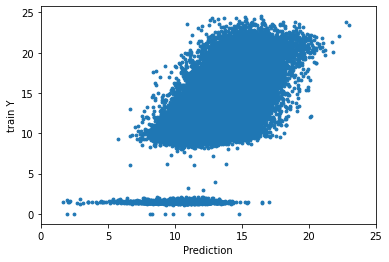

In [93]:
plt.scatter((model.predict(train_X))/60,train_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

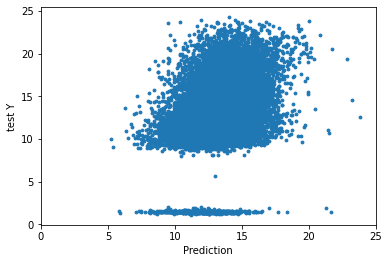

In [94]:
plt.scatter((model.predict(test_X))/60,test_Y/60,s=8)
plt.xlim([0,25])
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

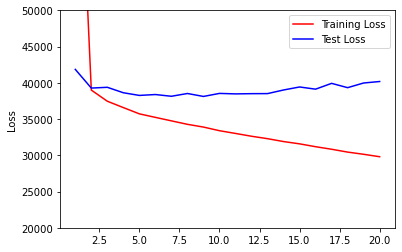

In [95]:
training_loss = history_4.history['loss']
test_loss = history_4.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, test_loss, 'b')
plt.legend(['Training Loss', 'Test Loss'])
plt.ylim([20000,50000])
plt.ylabel('Epoch')
plt.ylabel('Loss')
plt.show();